<a href="https://colab.research.google.com/github/aterterian/18S191/blob/master/DL_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Assignment1 a multiclass perceptron for the digitrecognition task.
# 0. 
# 1. Install the mnist package
# 2. import needed libraries: numpy?
# 3. Generate a training and a test set
# 4. Implement the perceptron algorithm
        #Start off with a Perceptron having random weights and a training set
        #For the inputs of an example in the training set, compute the Perceptron’s output
          #If the output of the Perceptron does not match the output that is known to be correct for the example:
            #If the output should have been 0 but was 1, decrease the weights that had an input of 1.
            #If the output should have been 1 but was 0, increase the weights that had an input of 1.
        #Go to the next example in the training set and repeat steps 2-4 until the Perceptron makes no more mistakes


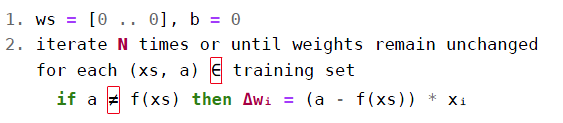

In [20]:
!pip install mnist


In [ ]:
import mnist
import numpy as np
import matplotlib.pyplot as plt

In [22]:
test_imgs = mnist.test_images()
print(test_imgs[47])
train_imgs = mnist.train_images()
print(f"train_imgs: {test_imgs[47]}")
test_lbls = mnist.test_labels()
train_lbls = mnist.train_labels()
test_lbls[-2]
train_lbls[-2]

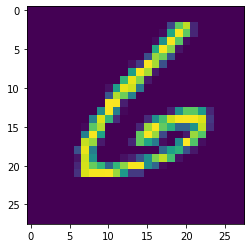

In [24]:
plt.imshow(train_imgs[-2].reshape(28, 28))

In [25]:
test_lbls = mnist.test_labels()
train_lbls = mnist.train_labels()
test_lbls[-2]
train_lbls[-2]

6

In [ ]:
len_train = train_imgs.size
print(len_train)
a = train_imgs
print(a.shape)

print(a.ndim)

print(a.dtype.name)

print(a.itemsize)
a.itemsize
print(a.size)

type(a)

47040000
(60000, 28, 28)
3
uint8
1
47040000


numpy.ndarray

In [ ]:
plt.imshow(test_imgs[47].reshape(28, 28))

In [ ]:
X_test = test_imgs.reshape(10000, 784)
X_train = train_imgs.reshape(60000, 784)

In [ ]:
X_test[47]

In [ ]:
Y_train = mnist.train_labels()
print(Y_train.shape)

Y_test = mnist.test_labels()
print(Y_test.shape)


(60000,)
(10000,)


In [ ]:
# parameter initialisation
b = 0
W = np.zeros(784)
print(b)
W

In [ ]:
a = 8
Y = (Y_train == np.ones(60000) * a) * 1
Y[:10]
Y1 = (Y_test == np.ones(10000) * a) * 1

In [ ]:
Y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [ ]:
temp = np.dot(X_train, W) + b
temp[:10]
#temp.shape

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
n_samples, n_features = X_train.shape
print(n_samples, n_features)

60000 784


In [ ]:
# Perceptron step
n_samples, n_features = X_train.shape
for i in range(n_samples):
  linear_output = np.dot(X_train[i], W) + b
  activation_output = np.where(linear_output>=0, 1, 0)
  update = Y[i] - activation_output
  W += update * X_train[i]
  b += update




In [ ]:
#many epoches
N = 200
n_samples, n_features = X_train.shape
for j in range(N):
  for i in range(n_samples):
    linear_output = np.dot(X_train[i], W) + b
    activation_output = np.where(linear_output>=0, 1, 0)
    update = Y[i] - activation_output
    W += update * X_train[i]
    b += update
  print(f"accuracy = {check_accuracy(X_train, W, b, Y)} - test accuracy: {check_accuracy(X_test, W, b, Y1)}")


accuracy = 0.8984333333333333 - test accuracy: 0.8959
accuracy = 0.9226333333333333 - test accuracy: 0.9136
accuracy = 0.9234833333333333 - test accuracy: 0.9128
accuracy = 0.9184166666666667 - test accuracy: 0.9109
accuracy = 0.9168 - test accuracy: 0.9098
accuracy = 0.9311166666666667 - test accuracy: 0.9236
accuracy = 0.9234666666666667 - test accuracy: 0.9188
accuracy = 0.9175666666666666 - test accuracy: 0.9103
accuracy = 0.9282166666666667 - test accuracy: 0.9191
accuracy = 0.9223666666666667 - test accuracy: 0.9143
accuracy = 0.9340166666666667 - test accuracy: 0.9221
accuracy = 0.9172333333333333 - test accuracy: 0.9101
accuracy = 0.9245666666666666 - test accuracy: 0.9171
accuracy = 0.9274166666666667 - test accuracy: 0.9212
accuracy = 0.9234333333333333 - test accuracy: 0.9165
accuracy = 0.9165666666666666 - test accuracy: 0.9098
accuracy = 0.9158833333333334 - test accuracy: 0.9085
accuracy = 0.9238666666666666 - test accuracy: 0.9149
accuracy = 0.9289333333333334 - test acc

In [ ]:
#Check accuracy
def check_accuracy(X, W, b, Y):
  gut = 0
  n_samples, n_features = X.shape
  for i in range(n_samples):
    linear_output = np.dot(X[i], W) + b
    activation_output = np.where(linear_output>=0, 1, 0)
    update = Y[i] - activation_output
    if update == 0:
      gut +=1
  return gut / n_samples

In [ ]:
import numpy as np


class Perceptron:

    def __init__(self, learning_rate=0.01, n_iters=1000):
        self.lr = learning_rate
        self.n_iters = n_iters
        self.activation_func = self._unit_step_func
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.n_iters):
            
            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)
                
                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x>=0, 1, 0)

In [ ]:
train = mnist.train_images()

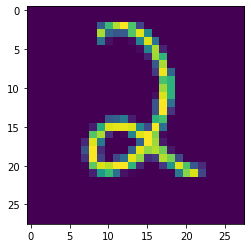

In [ ]:
#type(train)
#print(train[4])
plt.imshow(test_imgs[47].reshape(28, 28))
#plt.imshow(train[48].reshape(28, 28))